In [1]:
import math
import time
import collections
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import model_selection
from sklearn import datasets, metrics, neighbors 
from matplotlib.colors import ListedColormap

%matplotlib inline

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex',unicode=True)
# rc('text.latex',preamble=r'\\usepackage[utf8]{inputenc}')
# rc('text.latex',preamble=r'\\usepackage[russian]{babel}')

In [2]:
classification_problem = datasets.make_classification(
    n_samples=500, n_features=2, n_informative=2, n_classes=4,
    n_redundant=0, n_clusters_per_class=1, random_state=3)

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

In [4]:
# Код с семинара
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, k, colors=colors, light_colors=light_colors):
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize=(6, 6))
    xx, yy = get_meshgrid(train_data)
    plt.xlim([xx.min(), xx.max()])
    plt.ylim([yy.min(), yy.max()])
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    plt.title('$k = {0}$, accuracy={1:.2f}'.format(
            k, metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    

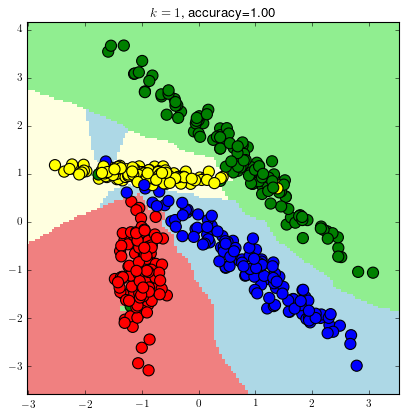

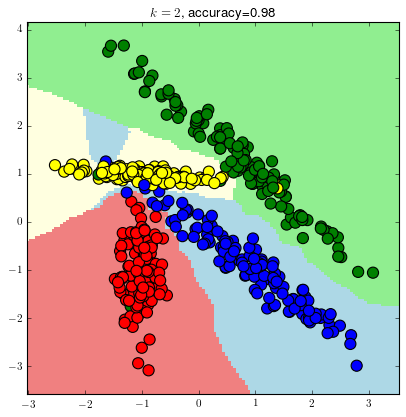

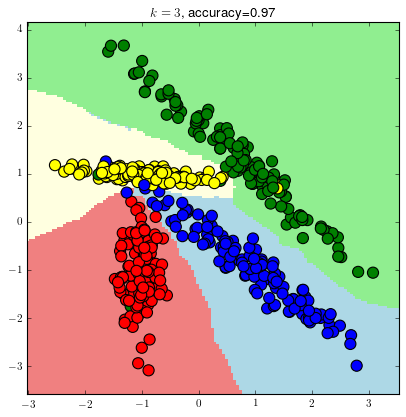

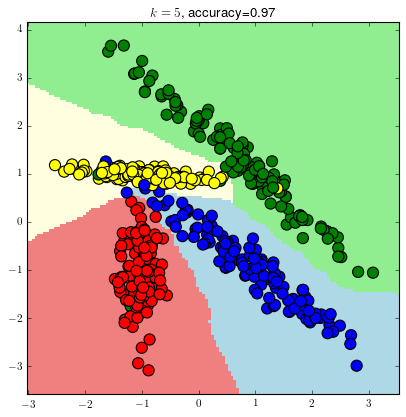

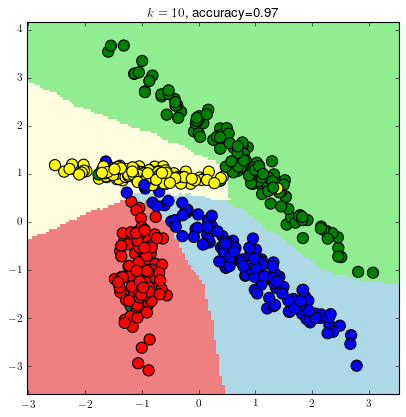

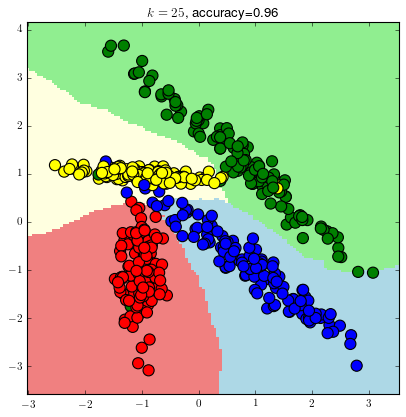

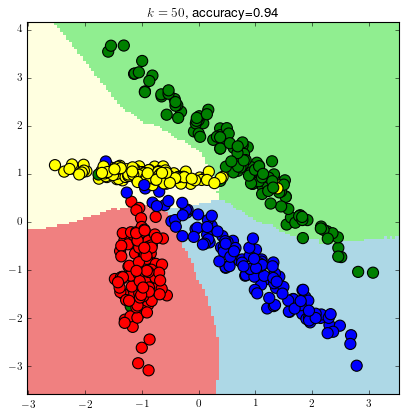

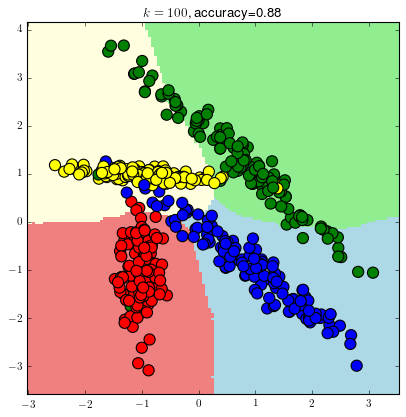

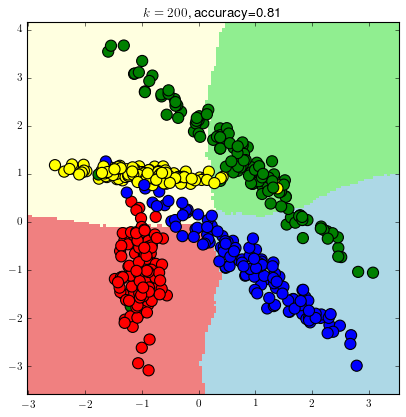

In [5]:
k_values = [1, 2, 3, 5, 10, 25, 50, 100, 200]

for k in k_values:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    plot_decision_surface(estimator, classification_problem[0], classification_problem[1], k)

In [6]:
def CV_accuracy(estimator, data, labels):
    scores = model_selection.cross_val_score(estimator, data, labels, cv=5)
    return np.mean(scores), np.std(scores)

In [7]:
MAX_K = 398

scores = []
scores_err = []

for k in tqdm_notebook(range(1, MAX_K + 1)):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    score, score_err = CV_accuracy(estimator, classification_problem[0], classification_problem[1])
    scores.append(score)
    scores_err.append(score_err)
    
scores = np.array(scores)
scores_err = np.array(scores_err)

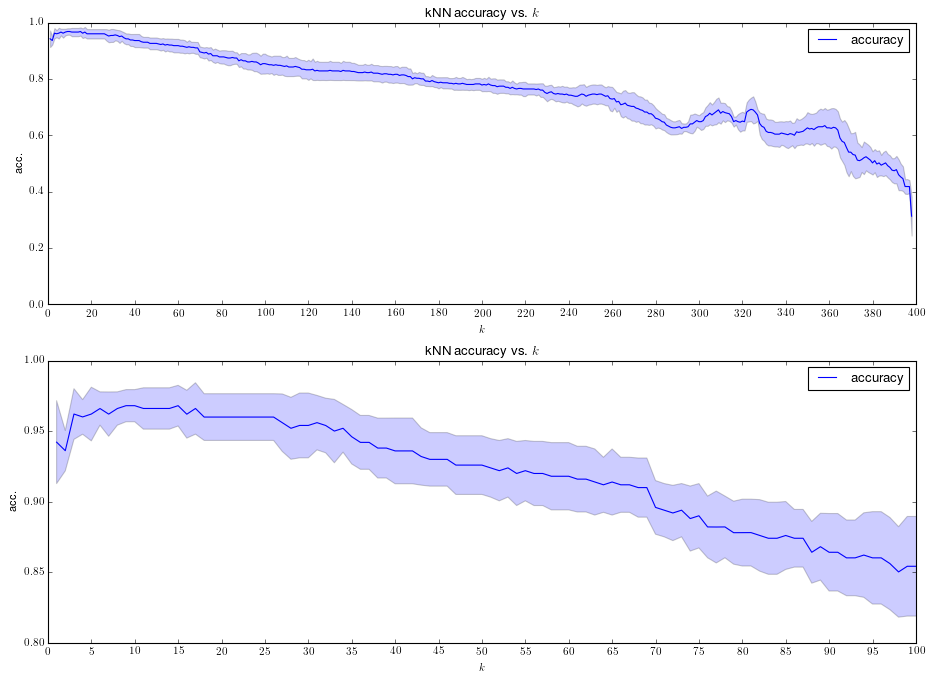

In [8]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(range(1, MAX_K + 1), scores, label="accuracy")
plt.fill_between(range(1, MAX_K + 1), scores + scores_err, scores - scores_err, alpha=0.2)
plt.title('kNN accuracy vs. $k$')
plt.legend()
plt.ylim([0, 1])
plt.xticks(np.arange(0, 401, 20))
plt.xlabel("$k$")
plt.ylabel("acc.")

plt.subplot(2, 1, 2)
plt.plot(range(1, MAX_K + 1), scores, label="accuracy")
plt.fill_between(range(1, MAX_K + 1), scores + scores_err, scores - scores_err, alpha=0.2)
plt.title('kNN accuracy vs. $k$')
plt.legend()
plt.xlim([0, 100])
plt.xticks(np.arange(0, 101, 5))
plt.ylim([0.8, 1])
plt.xlabel("$k$")
plt.ylabel("acc.")

Подойдёт любое значение $k$ от 5 до 25.